# Regression in Time Series

**Time series regression** is a statistical technique used to model the relationship between a dependent variable and one or more independent variables that change over time. In other words, it is a way of **predicting future values of a variable based on its past values and the values of other related variables**.

In time series regression, the dependent variable is a time series, which means that it is **assumed** as a sequence of **observations taken at regular intervals over time**. The **independent variables** can also be time series or other types of variables that are believed to have an impact on the dependent variable.

The goal of **time series regression is to identify the underlying patterns and trends** in the data and use this information to **make accurate predictions about future values of the dependent variable**. This is typically done by fitting a statistical model to the data and estimating the coefficients of the model using a variety of techniques, such as least squares or maximum likelihood estimation.

We should distinguish between **time series regression** and **time series forecasting**.

- In **time series forecasting**, the goal is to predict the future values of a variable based on its past values alone.
- In **time series regression**, the goal is to predict the past, present or future values of a variable based on its past values and the values of other related variables.

In other words, time series regression is a type of supervised learning, while time series forecasting is a type of unsupervised learning.

## Evaluate Models

Evaluating a time series regression model involves assessing the model's performance and accuracy in predicting future values of the time series. Next, some common methods for evaluating time series regression models are listed.

### Train-test split
When training a machine learning model, it's essential to evaluate its performance on data that hasn't been used during training. This is done to avoid overfitting, where the model performs well on the training data but poorly on new data. To achieve this, the original dataset is usually split into a training set and a test set. However, there are cases where a third subset, called the validation set, is added to the mix. Here are the main differences between two popular data splitting strategies: train-test and train-validation-test.

One potential issue with the train-test split is that the test set might be too small to provide a reliable estimate of the model's performance. The smaller the test set, the more likely it is that the evaluation metric will be affected by chance. To mitigate this issue, the train-validation-test split is often used.

#### Train-Validation-Test Split

The train-validation-test split involves dividing the original dataset into three subsets: a **training set, a validation set, and a test set**. The training set is used to train the model, the validation set is used to evaluate the model's performance during training and to tune the hyperparameters of the model, and the test set is used to evaluate the final performance of the model after training and tuning.

During training, the model is evaluated on the validation set after every epoch or after a fixed number of iterations. The hyperparameters of the model are then adjusted based on the performance on the validation set. This process is repeated until the best hyperparameters are found. Once the model has been fully trained and tuned, it is evaluated on the test set to obtain an estimate of its performance on new data.

One advantage of the train-validation-test split is that it provides a more accurate estimate of the model's performance on new data. By using a separate validation set, we can ensure that the model is not overfitting to the training data. By using a separate test set, we can ensure that the evaluation metric is not biased by chance.


#### Train-Test Split in time series

In time series analysis, a common approach to model evaluation is also to use a train-test split. However, the traditional random train-test split is not suitable for time series data, as it violates the assumption that the data points are independent and identically distributed (iid). In time series data, the order of the data points matters, and the past observations can be used to predict the future ones.

A more appropriate approach for time series data is to use a "rolling window" or "walk-forward" validation technique. This involves training the model on a portion of the data and testing it on a subsequent portion, sliding the window forward until the entire dataset has been used for testing. This allows for the evaluation of the model's performance on unseen data while maintaining the temporal ordering of the data.

In the rolling window technique, the size of the test set can be chosen based on the application requirements and the available data. However, a common practice is to use a test set that is large enough to provide a reliable estimate of the model's performance but small enough to allow for multiple iterations of the rolling window approach. The performance metrics are then aggregated over the different iterations to obtain a more robust estimate of the model's performance.

Let us see some examples using the airline passengers dataset.

In [3]:
import pandas as pd

df_passengers = pd.read_csv('./data/passengers_TS/passengers.csv', parse_dates=True)
df_passengers['Month'] = pd.to_datetime(df_passengers['Month'])
df_passengers['Year'] = df_passengers['Month'].dt.year
df_passengers['Month'] = df_passengers['Month'].dt.month

df_passengers.drop('Unnamed: 0', axis=1, inplace=True)

df_passengers

,Month,#Passengers,Year
0,1,112,1949
1,2,118,1949
2,3,132,1949
3,4,129,1949
4,5,121,1949
...,...,...,...
139,8,606,1960
140,9,508,1960
141,10,461,1960
142,11,390,1960


### Polynomial features
Beside the use o month, year as features, and #passengers as targer, it is also possible to do some increase in the number os features using polynomial features. Polynomial features are a type of feature engineering technique used in machine learning to create non-linear models by adding polynomial terms to the original features.

In simpler terms, polynomial features are created by taking the original features of a dataset and raising them to a power. For example, if we have a dataset with one feature $x$, we can create polynomial features by adding a new feature $x^2$. Obviously, we can also add higher order terms like $x^3$, $x^4$, and so on.
The general formula for generating polynomial features is as follows:
$$(x_1, x_2, \dots, x_n) \rightarrow (1, x_1, x_2, \dots, x_n, x_1^2, x_1x_2, \dots, x_1x_n, x_2^2, x_2x_3,\dots, x_n^2)$$



The purpose of adding polynomial features is to capture non-linear relationships between the features and the target variable. In some cases, the relationship between the features and the target variable may not be linear, and adding polynomial features can help to capture these non-linear relationships. This also increases model flexibility since we are increasing the number of dimensions of the dataset. This increased dimensionality can lead to a more flexible model that can fit more complex relationships. On the other side, it can lead to overfitting, where the model performs well on the training data but poorly on new, unseen data; increased model complexity which can make it harder to interpret the model and identify the most important features; and increased computation time required to train the model, especially if we generate a large number of features.

Overall, polynomial features can be a useful tool for improving the performance of machine learning models when the relationship between the features and the target variable is non-linear.

In [4]:
from sklearn.preprocessing import PolynomialFeatures

# get the features and target
X = df_passengers[['Month', 'Year']]
y = df_passengers['#Passengers']

# create the PolynomialFeatures model
poly_features_model = PolynomialFeatures(degree=5)

# fit and apply model
X = pd.DataFrame(poly_features_model.fit_transform(X),
                 columns = poly_features_model.get_feature_names_out(['Month', 'Year']))

X

,1,Month,Year,Month^2,Month Year,Year^2,Month^3,Month^2 Year,Month Year^2,Year^3,...,Month^3 Year,Month^2 Year^2,Month Year^3,Year^4,Month^5,Month^4 Year,Month^3 Year^2,Month^2 Year^3,Month Year^4,Year^5
0,1.0,1.0,1949.0,1.0,1949.0,3798601.0,1.0,1949.0,3798601.0,7.403473e+09,...,1949.0,3798601.0,7.403473e+09,1.442937e+13,1.0,1949.0,3.798601e+06,7.403473e+09,1.442937e+13,2.812284e+16
1,1.0,2.0,1949.0,4.0,3898.0,3798601.0,8.0,7796.0,7597202.0,7.403473e+09,...,15592.0,15194404.0,1.480695e+10,1.442937e+13,32.0,31184.0,3.038881e+07,2.961389e+10,2.885874e+13,2.812284e+16
2,1.0,3.0,1949.0,9.0,5847.0,3798601.0,27.0,17541.0,11395803.0,7.403473e+09,...,52623.0,34187409.0,2.221042e+10,1.442937e+13,243.0,157869.0,1.025622e+08,6.663126e+10,4.328811e+13,2.812284e+16
3,1.0,4.0,1949.0,16.0,7796.0,3798601.0,64.0,31184.0,15194404.0,7.403473e+09,...,124736.0,60777616.0,2.961389e+10,1.442937e+13,1024.0,498944.0,2.431105e+08,1.184556e+11,5.771748e+13,2.812284e+16
4,1.0,5.0,1949.0,25.0,9745.0,3798601.0,125.0,48725.0,18993005.0,7.403473e+09,...,243625.0,94965025.0,3.701737e+10,1.442937e+13,3125.0,1218125.0,4.748251e+08,1.850868e+11,7.214685e+13,2.812284e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.0,8.0,1960.0,64.0,15680.0,3841600.0,512.0,125440.0,30732800.0,7.529536e+09,...,1003520.0,245862400.0,6.023629e+10,1.475789e+13,32768.0,8028160.0,1.966899e+09,4.818903e+11,1.180631e+14,2.892547e+16
140,1.0,9.0,1960.0,81.0,17640.0,3841600.0,729.0,158760.0,34574400.0,7.529536e+09,...,1428840.0,311169600.0,6.776582e+10,1.475789e+13,59049.0,12859560.0,2.800526e+09,6.098924e+11,1.328210e+14,2.892547e+16
141,1.0,10.0,1960.0,100.0,19600.0,3841600.0,1000.0,196000.0,38416000.0,7.529536e+09,...,1960000.0,384160000.0,7.529536e+10,1.475789e+13,100000.0,19600000.0,3.841600e+09,7.529536e+11,1.475789e+14,2.892547e+16
142,1.0,11.0,1960.0,121.0,21560.0,3841600.0,1331.0,237160.0,42257600.0,7.529536e+09,...,2608760.0,464833600.0,8.282490e+10,1.475789e+13,161051.0,28696360.0,5.113170e+09,9.110739e+11,1.623368e+14,2.892547e+16


#### Model

Now, we will use a pipeline to implement a ML solution, which starts by scaling data, before training the model. More about the Ridge model will be discussed below.

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# split the data into training and test sets, predictiong the next year
n_train = 12
X_train = X.iloc[:-n_train]
y_train = y[:-n_train]

X_test =  X.iloc[-n_train:]
y_test = y[-n_train:]

# fit a regression model to the training data
reg_model = Pipeline([
    ('scaler', StandardScaler()),
    ('Ridge', Ridge(alpha=0.001, max_iter=10**4))
])
reg_model.fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = reg_model.predict(X_test)

# build a dataframe with the real, predicted and error values
df_test_pred = pd.DataFrame()
df_test_pred['# passenger'] = y_test
df_test_pred['# pred passenger'] = y_test_pred
df_test_pred['error'] = df_test_pred['# passenger'] - df_test_pred['# pred passenger']
df_test_pred

,# passenger,# pred passenger,error
132,417,415.144780,1.855220
133,391,408.019284,-17.019284
134,419,420.455830,-1.455830
135,461,445.833198,15.166802
136,472,475.420749,-3.420749
137,535,500.132579,34.867421
138,622,512.281669,109.718331
139,606,507.334040,98.665960
140,508,485.662898,22.337102
141,461,454.302791,6.697209


### Visual inspection
In addition to numerical metrics, it's important to visually inspect the model's performance. This can include plotting the predicted values against the actual values and examining the residual plots to ensure that the model is capturing the underlying patterns in the data.


<Axes: >

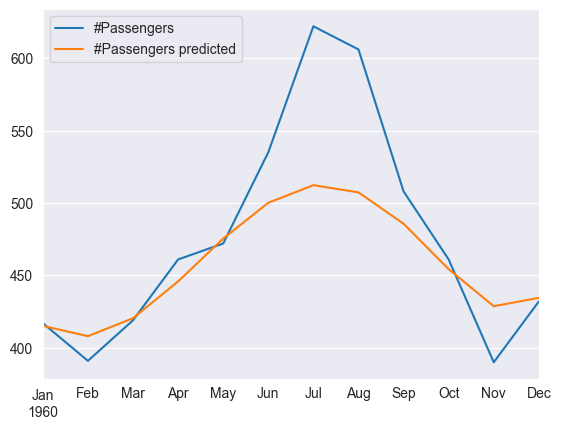

In [5]:
df_test = pd.DataFrame(y_test)
df_test["#Passengers predicted"] =  y_test_pred
df_test.set_index(pd.to_datetime(dict(year=X_test.Year, month=X_test.Month, day=1)), inplace=True)
df_test.plot()

### Mean absolute error (MAE)
The MAE is a common metric used to evaluate time series regression models. It measures the average absolute difference between the predicted values $\hat{y}_t$ and the actual values $y_t$:
$$\text{MAE} = \frac{1}{n}\sum_{t=1}^{n}|\hat{y}_t - y_t|$$

A lower MAE indicates a more accurate model. Let us see an example.

In [6]:
# compute the MAE for the test set
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_test_pred)
print('MAE:', mae)

MAE: 29.366095464470348


|### Mean squared error (MSE)
The MSE is another common metric used to evaluate time series regression models. It measures the average squared difference between the predicted values and the actual values:
$$\text{MSE} = \frac{1}{n}\sum_{t=1}^{n}(\hat{y}_t - y_t)^2$$

The MSE penalizes large errors more heavily than small errors.

In [7]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_test_pred)
print('MSE:', MSE)

MSE: 2131.144070948463


### Root mean squared error (RMSE)
The RMSE is the square root of the MSE and is often used as a measure of the model's accuracy. Like the MSE, the RMSE penalizes large errors more heavily than small errors:
$$\text{RMSE} = \sqrt{\text{MSE}}$$


In [8]:
RMSE = MSE ** .5
print('RMSE:', RMSE)

RMSE: 46.16431599134187


### Coefficient of determination (R-squared)
The R-squared value measures the proportion of the variance in the dependent variable that is explained by the independent variables in the model. A higher R-squared value indicates a better fit. It is calculated as follows:
$$\text{R-squared} = 1 - \frac{\text{SSE}}{\text{SST}}$$

where $\text{SSE}$ is the sum of squared errors and $\text{SST}$ is the total sum of squares:

$$\text{SSE} = \sum_{t=1}^{n}(\hat{y}_t - y_t)^2$$

$$\text{SST} = \sum_{t=1}^{n}(y_t - \bar{y})^2$$

where $\bar{y}$ is the mean of the actual values.


In [9]:
from sklearn.metrics import r2_score

R2 = r2_score(y_test, y_test_pred)
print('R2:', R2)

R2: 0.6152803037085128


## ("Standard") Machine Learning models

Several "standard" machine learning model exist that can be used to do time series regression. Next, some examples are shown. Note that no special attention was taken to the tunning of the methods.

Instead of the Passengers airlines data, we will be using the house consumption data.

In [11]:
df_energy = pd.read_csv("./data/house_consumption_TS/house_consumption.csv", parse_dates=True)
df_energy.date = pd.to_datetime(df_energy.date)

# use only data previous to "2022-12-28"  (the house installed photovoltaic panel on that date which probably changed the energy consumption behaviour
query = df_energy.date < "2022-12-28"
df_energy = df_energy[query]

# resamplie to hour consumptions instead of 15 minutes
df_energy.set_index('date', inplace=True)
df_energy = df_energy.resample('H').mean()

# expand the date to its components (we can't feed the algorithms with dates/strings)
df_energy['hour'] = df_energy.index.hour
df_energy['day'] = df_energy.index.day
df_energy['day of week'] = df_energy.index.dayofweek
df_energy['month'] = df_energy.index.month

df_energy.head()

,kw,hour,day,day of week,month
date,,,,,
2021-02-04 10:00:00,0.764,10,4,3,2
2021-02-04 11:00:00,0.972,11,4,3,2
2021-02-04 12:00:00,0.936,12,4,3,2
2021-02-04 13:00:00,0.946,13,4,3,2
2021-02-04 14:00:00,1.112,14,4,3,2


In [12]:
# We can see that 2 values are missing in the kw column: lets us remove those 2 lines
df_energy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16598 entries, 2021-02-04 10:00:00 to 2022-12-27 23:00:00
Freq: H
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   kw           16596 non-null  float64
 1   hour         16598 non-null  int32  
 2   day          16598 non-null  int32  
 3   day of week  16598 non-null  int32  
 4   month        16598 non-null  int32  
dtypes: float64(1), int32(4)
memory usage: 518.7 KB


In [13]:
df_energy.dropna(inplace=True)

Further, we will be using polynomial features

In [14]:
from sklearn.preprocessing import PolynomialFeatures

independent_cols = ['hour', 'day', 'day of week', 'month']
X = df_energy[independent_cols]
y = df_energy['kw']

# build he poy features
poly_features_model = PolynomialFeatures(degree=5)
X = pd.DataFrame(
    poly_features_model.fit_transform(X),
    columns=poly_features_model.get_feature_names_out(independent_cols)
)

# keep the index for later
X.index = df_energy.index

X

,1,hour,day,day of week,month,hour^2,hour day,hour day of week,hour month,day^2,...,day day of week^3 month,day day of week^2 month^2,day day of week month^3,day month^4,day of week^5,day of week^4 month,day of week^3 month^2,day of week^2 month^3,day of week month^4,month^5
date,,,,,,,,,,,,,,,,,,,,,
2021-02-04 10:00:00,1.0,10.0,4.0,3.0,2.0,100.0,40.0,30.0,20.0,16.0,...,216.0,144.0,96.0,64.0,243.0,162.0,108.0,72.0,48.0,32.0
2021-02-04 11:00:00,1.0,11.0,4.0,3.0,2.0,121.0,44.0,33.0,22.0,16.0,...,216.0,144.0,96.0,64.0,243.0,162.0,108.0,72.0,48.0,32.0
2021-02-04 12:00:00,1.0,12.0,4.0,3.0,2.0,144.0,48.0,36.0,24.0,16.0,...,216.0,144.0,96.0,64.0,243.0,162.0,108.0,72.0,48.0,32.0
2021-02-04 13:00:00,1.0,13.0,4.0,3.0,2.0,169.0,52.0,39.0,26.0,16.0,...,216.0,144.0,96.0,64.0,243.0,162.0,108.0,72.0,48.0,32.0
2021-02-04 14:00:00,1.0,14.0,4.0,3.0,2.0,196.0,56.0,42.0,28.0,16.0,...,216.0,144.0,96.0,64.0,243.0,162.0,108.0,72.0,48.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 19:00:00,1.0,19.0,27.0,1.0,12.0,361.0,513.0,19.0,228.0,729.0,...,324.0,3888.0,46656.0,559872.0,1.0,12.0,144.0,1728.0,20736.0,248832.0
2022-12-27 20:00:00,1.0,20.0,27.0,1.0,12.0,400.0,540.0,20.0,240.0,729.0,...,324.0,3888.0,46656.0,559872.0,1.0,12.0,144.0,1728.0,20736.0,248832.0
2022-12-27 21:00:00,1.0,21.0,27.0,1.0,12.0,441.0,567.0,21.0,252.0,729.0,...,324.0,3888.0,46656.0,559872.0,1.0,12.0,144.0,1728.0,20736.0,248832.0


Now, let us define the train and test data sets. Note that, for obvious reasons, in this case, the data should not be shuffled. Further, we'll keep out the next day (48 hours) and try to predict it

In [15]:
n_train = 48

# training data
X_train = X.iloc[:-n_train]
y_train = y.iloc[:-n_train]

# testing data
X_test = X.iloc[-n_train:]
y_test = y.iloc[-n_train:]


### Linear regression

Linear regression is a simple and widely used method for time series regression. It models the relationship between the independent variables and the dependent variable using a linear function. Four examples will be shown next.

#### Ordinary Least Squares (OLS):
OLS is a linear regression method that minimizes the sum of the squared residuals (the differences between the predicted and actual values of the dependent variable) using a closed-form solution. The mathematical formulation for OLS is:

$$\beta_{OLS} = (X^TX)^{-1}X^Ty$$

where $\beta_{OLS}$ is the vector of coefficients, $X$ is the matrix of independent variables, $y$ is the vector of dependent variable values. The OLS method seeks to find the values of $\beta$ that minimize the residual sum of squares (RSS):

$$RSS = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2$$

where $\hat{y}_i$ is the predicted value of $y_i$ based on the model, $p$ is the number of independent variables or predictors in the regression model (i.e., $p$ is the number of columns in the matrix $X$), and $n$ is the number of observations or data points in the dataset (i.e., $n$ is the number of rows in the matrix $X$ and the length of the vectors $y$ and $\beta$).

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

ols_model = Pipeline([
    ('scaler', StandardScaler()),
    ('OLS', LinearRegression())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = ols_model.predict(X_test)

Let us define a method to present the results in a systematic way

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.56778731 0.76882484 0.90061072 0.97594676 1.00657159 1.00314846
 0.9752531  0.93136153 0.87883787 0.82392223 0.77171849 0.72618213
 0.69010809 0.66511859 0.65165094 0.6489454  0.65503298 0.66672329
 0.67959238 0.68797053 0.68493012 0.66227345 0.61052056 0.51889706
 0.56756956 0.75963404 0.88517142 0.95645599 0.98475659 0.98032449
 0.9523812  0.90910633 0.85762535 0.8039975  0.75320358 0.70913378
 0.67457552 0.65120126 0.63955637 0.63904692 0.64792753 0.66328921
 0.68104716 0.69592862 0.7014607  0.68995819 0.65251145 0.57897415]
MAE: 0.39036458443849914
MSE: 0.2508693315984098
RMSE: 0.5008685771721059
R2: -0.1107675713724563


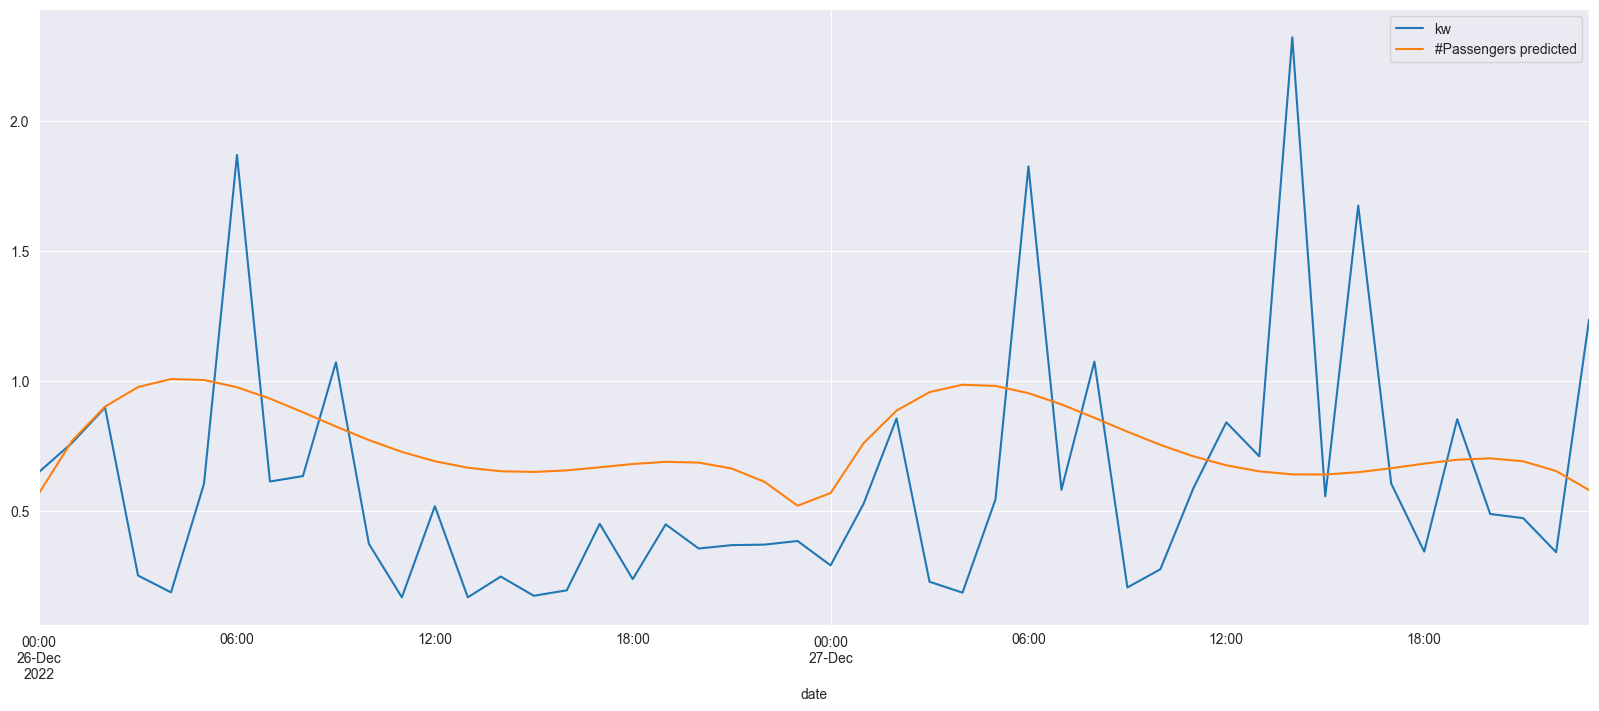

In [17]:
def print_results(y_test, y_test_pred):
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score

    # compute the MAE for the test set
    print('real values:', y_test.values)
    print('Predictions:', y_test_pred)

    mae = mean_absolute_error(y_test, y_test_pred)
    print('MAE:', mae)

    MSE = mean_squared_error(y_test, y_test_pred)
    print('MSE:', MSE)

    RMSE = MSE ** .5
    print('RMSE:', RMSE)

    R2 = r2_score(y_test, y_test_pred)
    print('R2:', R2)

    df_test = pd.DataFrame(y_test)
    df_test["#Passengers predicted"] =  y_test_pred
    df_test.set_index(X_test.index, inplace=True)
    df_test.plot(figsize=(20, 8))

print_results(y_test, y_test_pred)

#### Lasso

Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression method that includes a penalty term on the absolute values of the coefficients to encourage sparsity in the model. The mathematical formulation for Lasso is:

$$\beta_{lasso} = argmin_{\beta} \left\{ \frac{1}{n} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2 + \lambda \sum_{j=1}^p |\beta_j| \right\}$$

where $\beta_{lasso}$ is the vector of coefficients, $y$ is the vector of dependent variable values, $x_{ij}$ is the value of the $j$-th independent variable for the $i$-th observation, $\lambda$ is the regularization parameter. The Lasso method seeks to find the values of $\beta$ that minimize the following objective function:

$$\min_\beta \frac{1}{n} \sum_{i=1}^n \left(y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j\right)^2 + \lambda \sum_{j=1}^p |\beta_j|$$

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604]
MAE: 0.33267617939730887
MSE: 0.22588036958413119
RMSE: 0.4752687340696116
R2: -0.0001245985113815795


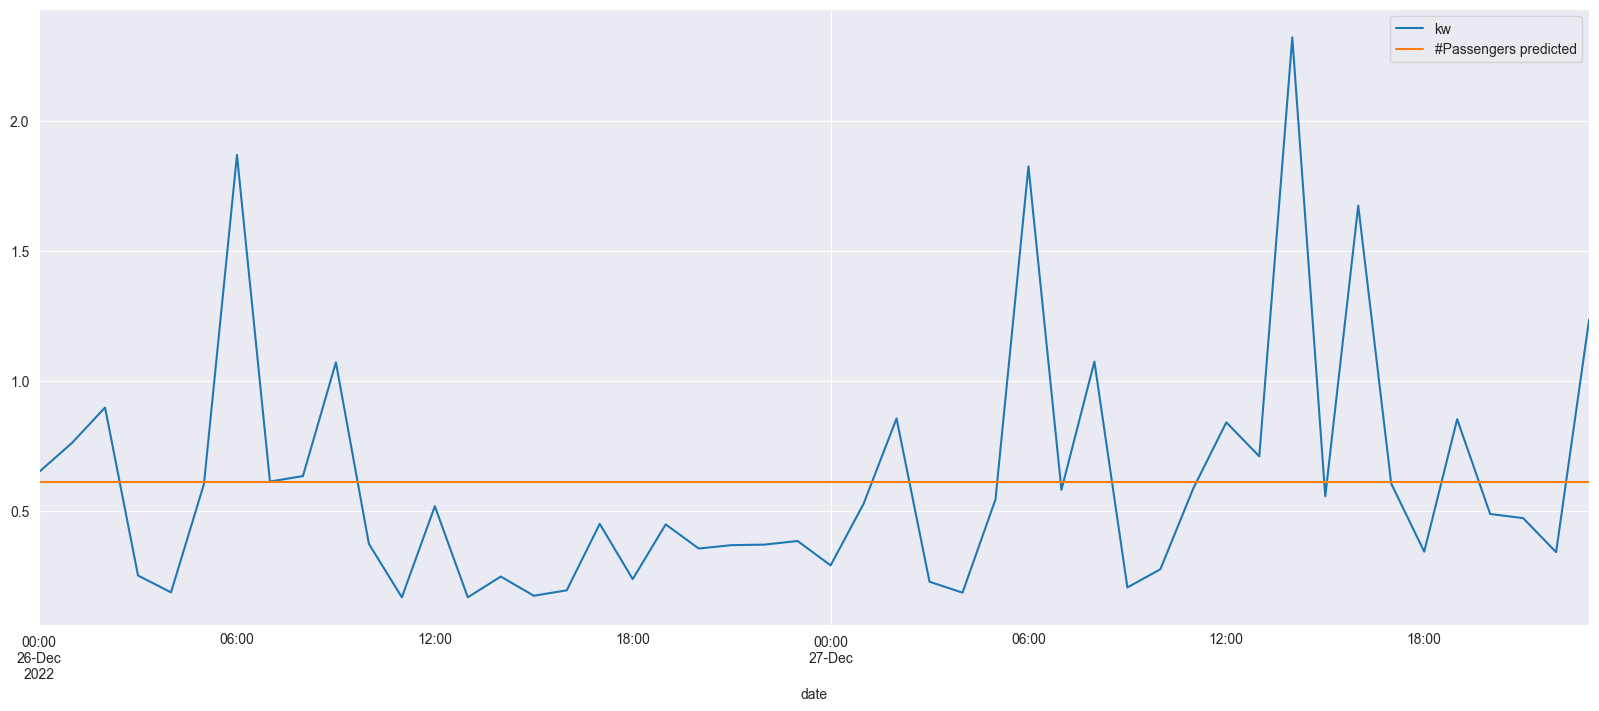

In [18]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline

lasso_model = Pipeline([
    ('scaler', StandardScaler()),
    ('Lasso', Lasso())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = lasso_model.predict(X_test)

print_results(y_test, y_test_pred)

#### Ridge
Ridge regression is a linear regression method that includes a penalty term on the squared values of the coefficients to prevent overfitting. The mathematical formulation for Ridge is:

$$\hat{\beta}_{ridge} = \arg \min_{\beta} \left\{\sum_{i=1}^{n}(y_i-\beta_0-\sum_{j=1}^{p}x_{ij}\beta_j)^2 + \lambda \sum_{j=1}^{p}\beta_j^2\right\}$$

where $\beta_{ridge}$ is the vector of coefficients, $y$ is the vector of dependent variable values, $x_{ij}$ is the value of the $j$-th independent variable for the $i$-th observation, $\lambda$ is the regularization parameter.


real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.55751665 0.70794956 0.80173427 0.84863874 0.85807611 0.83899908
 0.79979434 0.74817703 0.69108515 0.63457395 0.58371042 0.54246768
 0.51361939 0.49863421 0.49757022 0.50896932 0.5297517  0.55511021
 0.57840484 0.59105711 0.58244454 0.53979499 0.4480812  0.28991513
 0.55440394 0.70978176 0.80776555 0.85831288 0.87100323 0.85493236
 0.81860678 0.76983815 0.71563772 0.66211073 0.61435089 0.57633475
 0.55081615 0.53922065 0.54153996 0.55622634 0.58008706 0.60817879
 0.63370208 0.64789571 0.63993119 0.59680713 0.50324373 0.34157712]
MAE: 0.3360043967223287
MSE: 0.23201859821321377
RMSE: 0.48168308898404744
R2: -0.027302672704082598


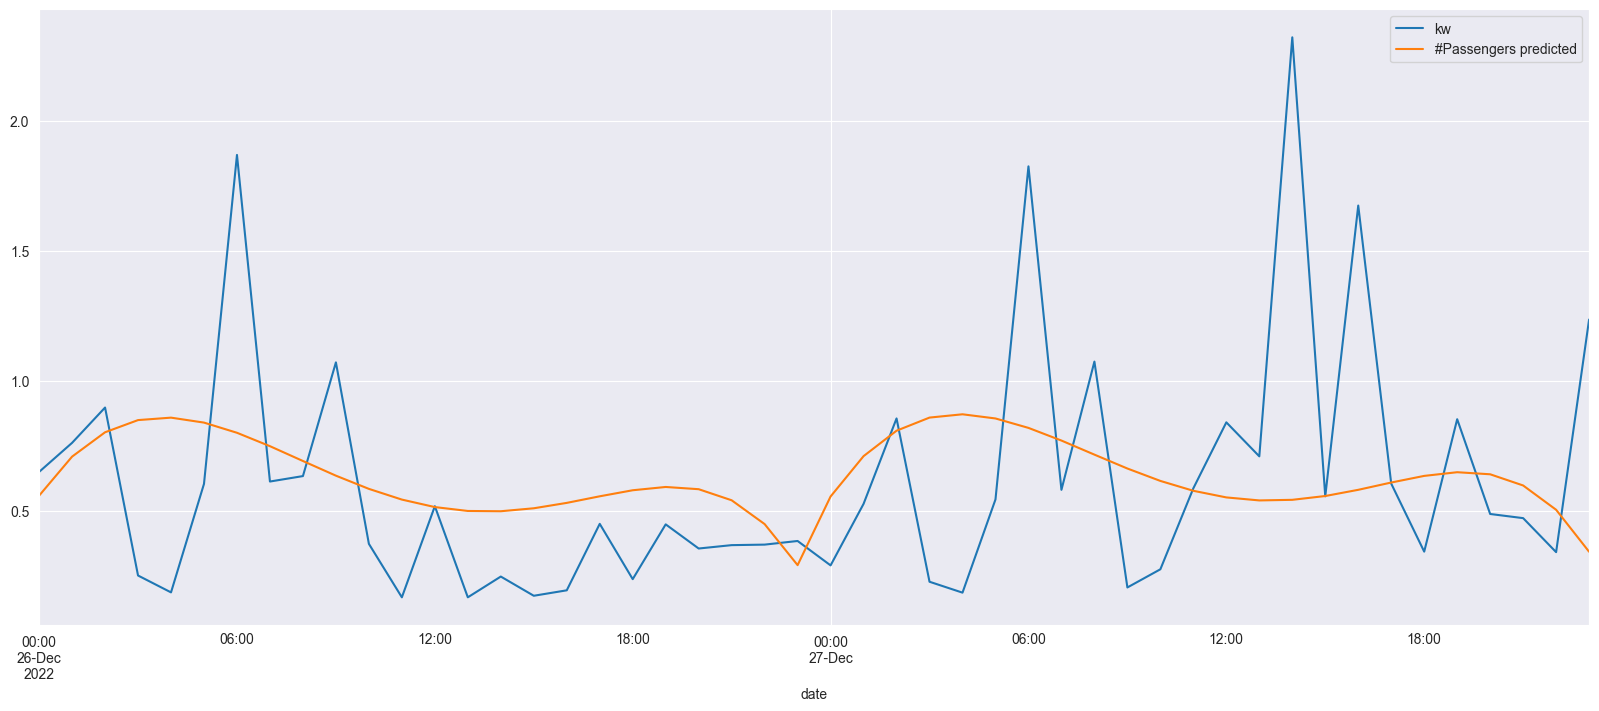

In [19]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline

ridge_model = Pipeline([
    ('scaler', StandardScaler()),
    ('Ridge', Ridge())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = ridge_model.predict(X_test)

print_results(y_test, y_test_pred)

#### Elastic Net
Elastic Net is a linear regression method that combines both Lasso and Ridge penalties to achieve both sparsity and prevent overfitting. The mathematical formulation for Elastic Net is:

$$\beta_{elastic} = argmin_{\beta} \left\{ \frac{1}{n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \beta_j^2 \right\}$$

where $\beta_{elastic}$ is the vector of coefficients, $y$ is the vector of dependent variable values, $x_{ij}$ is the value of the $j$-th independent variable for the $i$-th observation, $\lambda_1$ and $\lambda_2$ are regularization parameters. The Elastic Net method seeks to find the values of $\beta$ that minimize the following objective function:

$$\text{minimize } \frac{1}{2n} \sum_{i=1}^n (y_i - \beta_0 - \sum_{j=1}^p x_{ij}\beta_j)^2 + \lambda_1 \sum_{j=1}^p |\beta_j| + \lambda_2 \sum_{j=1}^p \beta_j^2$$

Note that when $\lambda_1 = 0$ and $\lambda_2 > 0$, Elastic Net reduces to Ridge regression, and when $\lambda_1 > 0$ and $\lambda_2 = 0$, Elastic Net reduces to Lasso regression.


real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604
 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604 0.61071604]
MAE: 0.33267617939730887
MSE: 0.22588036958413119
RMSE: 0.4752687340696116
R2: -0.0001245985113815795


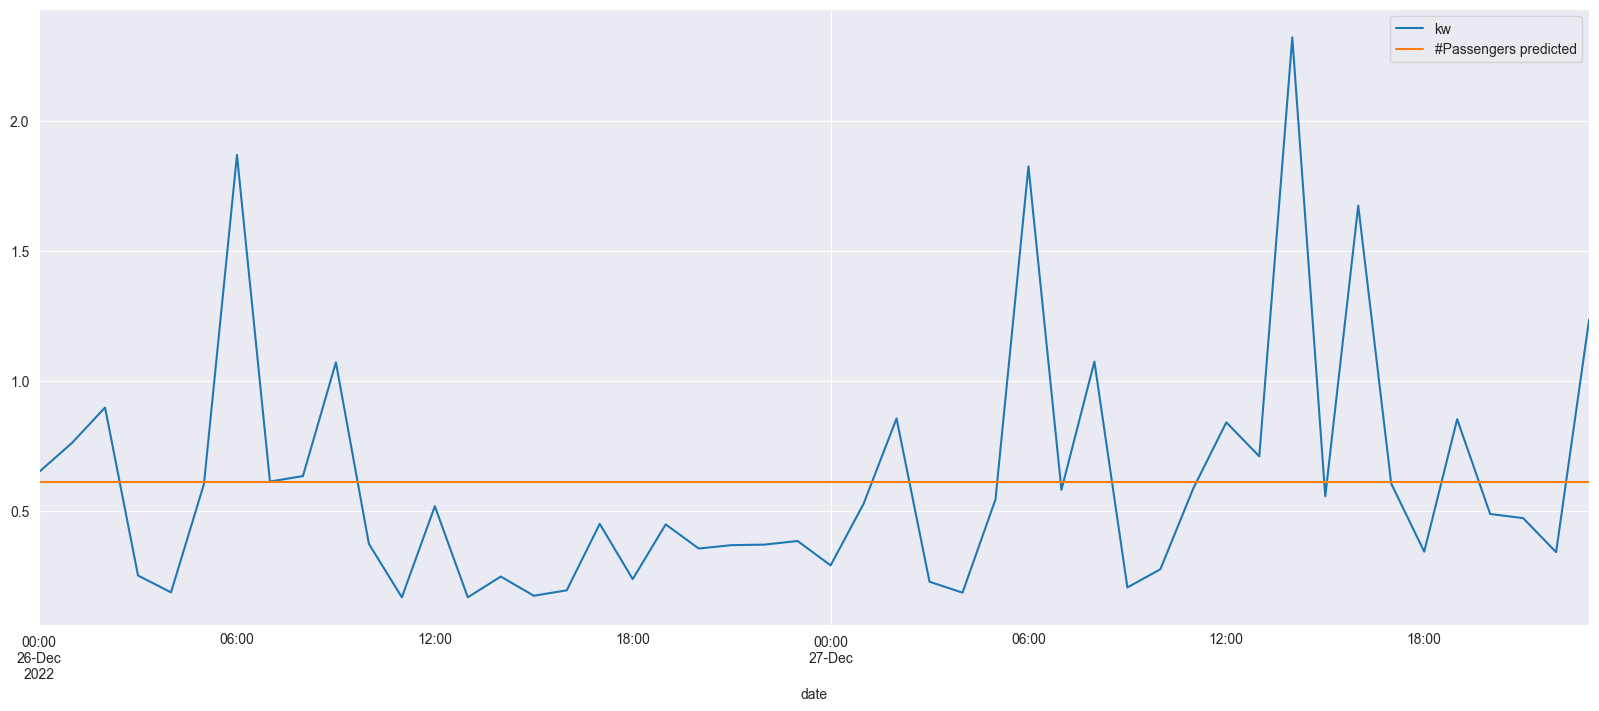

In [20]:
from sklearn.linear_model import ElasticNet

elasticnet_model = Pipeline([
    ('scaler', StandardScaler()),
    ('ElasticNet', ElasticNet())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = elasticnet_model.predict(X_test)

print_results(y_test, y_test_pred)

### Decision trees

A decision tree algorithm is a predictive modeling tool used in machine learning to identify relationships between input variables and their corresponding output variables. It creates a tree-like model of decisions and their possible consequences, based on a set of rules and data. At each node of the tree, the algorithm chooses the best attribute to split the data into two or more subsets, based on their level of impurity. The attribute that creates the most homogeneous subsets is selected as the best splitter. This process continues recursively, creating more nodes and subtrees, until a stopping criterion is met, such as a predefined maximum depth or a minimum number of samples per leaf. Once the decision tree is built, it can be used to make predictions for new input data by traversing the tree from the root to a leaf node and outputting the corresponding class label or numerical value. Decision trees are easy to interpret and visualize, and can handle both categorical and continuous data.

Decision trees can be susceptible to extrapolation, which is the process of making predictions outside the range of the training data. This is because decision trees are designed to model the relationships between input and output variables based on the patterns observed in the training data. If the data used to train the decision tree does not adequately cover the entire range of the input variables, then the tree may not be able to accurately predict the output values for input variables outside that range.


real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.18  0.468 0.501 0.886 0.863 0.255 1.8   1.419 0.769 0.373 0.229 0.366
 0.381 1.058 0.45  0.381 0.401 0.718 0.483 1.249 0.392 0.41  0.466 0.424
 0.517 0.338 0.501 1.608 0.863 0.682 1.822 1.419 0.298 0.494 0.229 0.313
 0.381 1.209 0.513 0.615 0.401 0.155 0.245 0.498 0.289 0.41  0.466 0.424]
MAE: 0.4053541666666667
MSE: 0.3102398125
RMSE: 0.5569917526319398
R2: -0.373640695249716


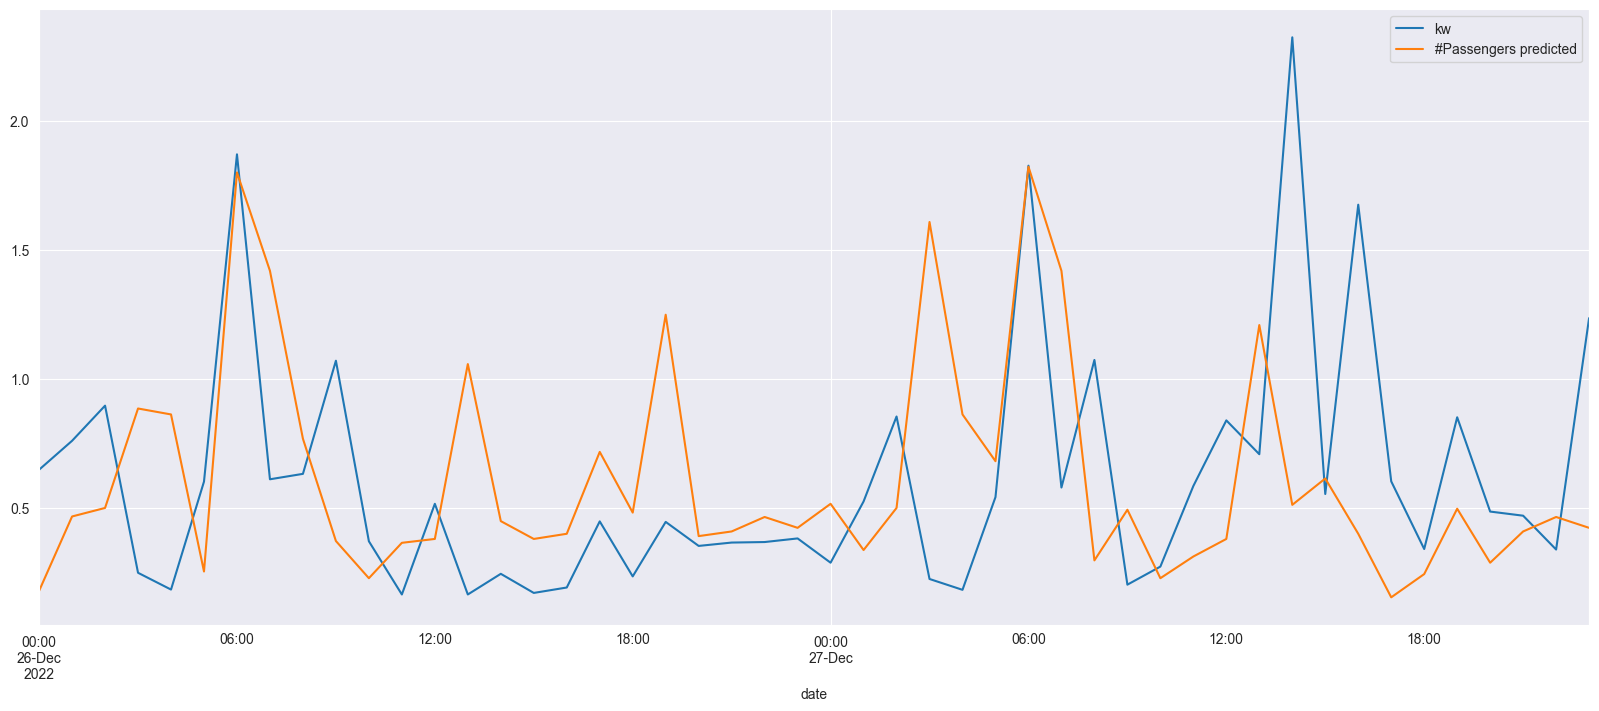

In [21]:
from sklearn.tree import DecisionTreeRegressor

model = Pipeline([
    ('scaler', StandardScaler()),
    ('method', DecisionTreeRegressor())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = model.predict(X_test)

print_results(y_test, y_test_pred)

### Random forests

Random forest is a popular machine learning algorithm that combines the power of decision trees with the benefits of ensemble learning. It creates a forest of decision trees, where each tree is trained on a randomly sampled subset of the training data and a randomly selected subset of the input features. The outputs of the individual trees are then combined through a voting or averaging mechanism to produce the final prediction.

The main advantage of random forests over single decision trees is their ability to reduce overfitting and improve accuracy. By combining the predictions of multiple trees, random forests are able to better capture the underlying relationships between the input and output variables and generalize to new data.

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.56376 0.46135 0.75503 1.03385 0.91258 0.72481 1.71177 1.3088  0.37248
 0.42655 0.31182 0.36268 0.58198 0.81051 0.70972 0.53833 0.46504 0.43753
 0.52842 0.90016 0.61925 0.49232 0.46186 0.44316 0.66222 0.48509 0.67272
 1.25682 0.83991 0.65763 1.73851 1.36873 0.37607 0.38411 0.30132 0.34088
 0.67751 1.01979 0.73024 0.48832 0.39251 0.34705 0.37099 0.61321 0.49411
 0.43179 0.36453 0.35828]
MAE: 0.3458783333333333
MSE: 0.24249777467916658
RMSE: 0.49244063061364723
R2: -0.07370104798138821


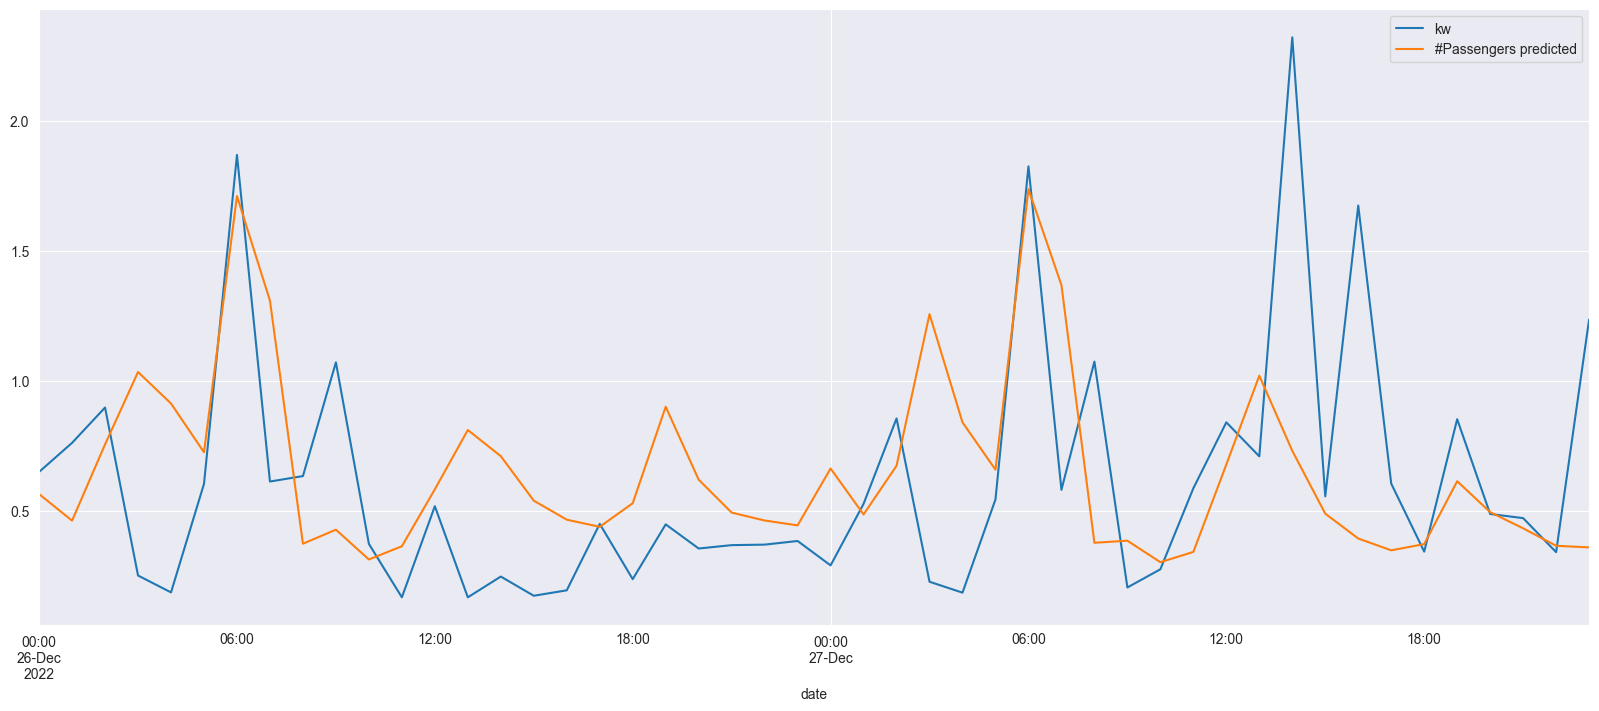

In [22]:
from sklearn.ensemble import RandomForestRegressor

model = Pipeline([
    ('scaler', StandardScaler()),
    ('method', RandomForestRegressor())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = model.predict(X_test)

print_results(y_test, y_test_pred)

### Support vector machines (SVM)
SVM (Support Vector Machine) regression is a machine learning algorithm that can be used for both classification and regression tasks. In SVM regression, the goal is to predict a continuous output variable by finding the best possible linear function that approximates the data in a high-dimensional feature space.

The basic idea of SVM regression is to find a hyperplane that maximizes the margin between the predicted values and the actual output values. The hyperplane is defined by a set of support vectors, which are the training examples closest to the decision boundary. The distance between the hyperplane and the support vectors is known as the margin, and the goal of SVM regression is to maximize this margin while minimizing the training error.

In contrast to traditional linear regression methods, which aim to minimize the sum of squared errors between the predicted and actual output values, SVM regression uses a loss function that penalizes deviations from the true output values. The penalty parameter C controls the trade-off between minimizing the training error and maximizing the margin, and can be tuned to optimize the performance of the algorithm.

SVM regression is a powerful technique that can handle both linear and nonlinear relationships between the input and output variables. It is particularly useful in cases where there are many input variables and a small number of training examples. However, it can be sensitive to outliers and may require careful parameter tuning to achieve good performance.

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.54313498 0.67523185 0.77854135 0.84933873 0.88604383 0.88944094
 0.86277657 0.81168334 0.74387131 0.66853301 0.59543243 0.53370314
 0.49047214 0.46954839 0.47053563 0.48877525 0.51638702 0.54426895
 0.56430967 0.57065274 0.55932587 0.52729186 0.47381599 0.40576467
 0.57282516 0.72431727 0.84015128 0.91527211 0.94759217 0.93830546
 0.8919882  0.8164069  0.7219533  0.62064804 0.52471268 0.44481809
 0.38827467 0.35761044 0.35010523 0.35877435 0.37485728 0.39101623
 0.40349569 0.41131396 0.4123052  0.39957714 0.36465945 0.30944007]
MAE: 0.3584281101839482
MSE: 0.2634121577794016
RMSE: 0.5132369411679186
R2: -0.16630311446350898


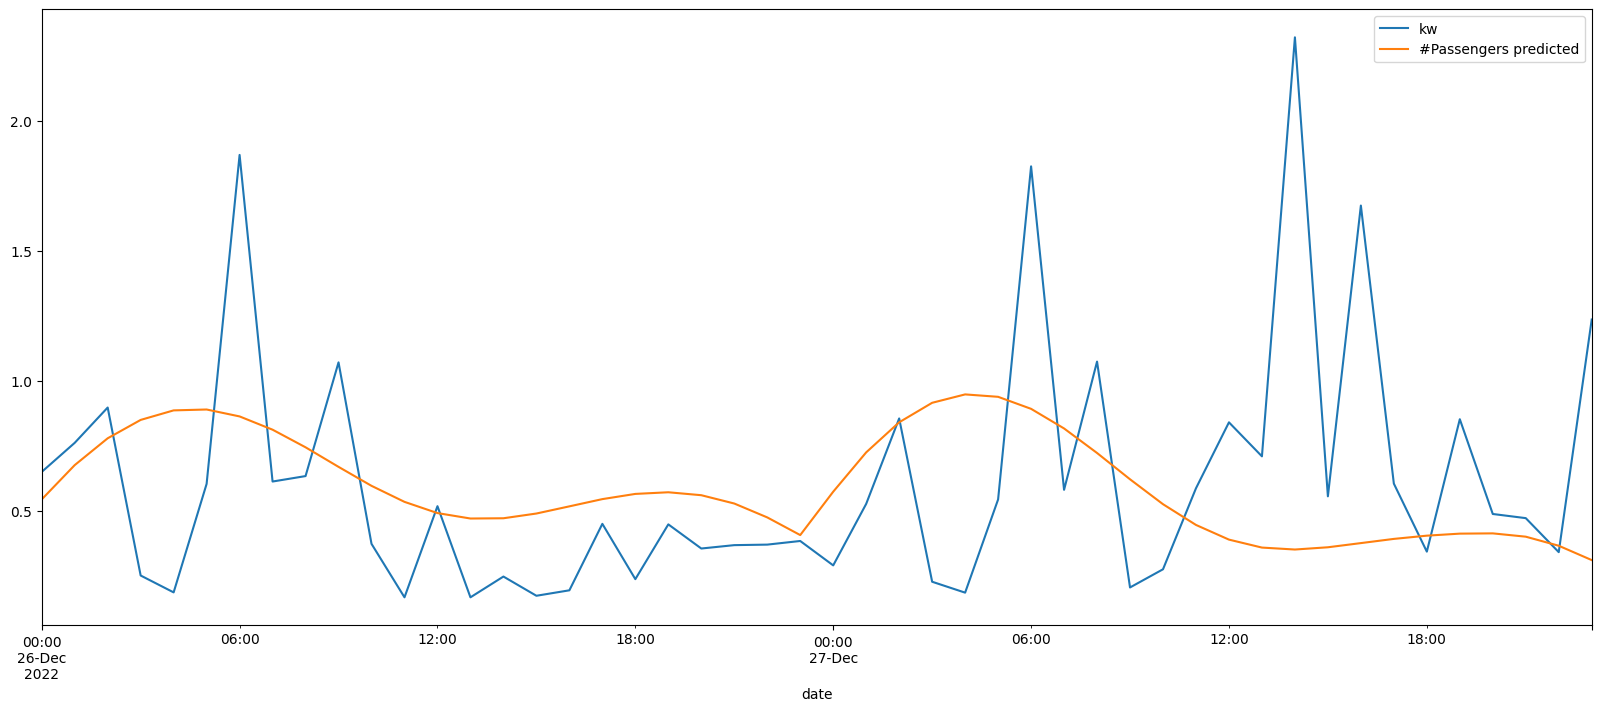

In [21]:
from sklearn.svm import SVR

model = Pipeline([
    ('scaler', StandardScaler()),
    ('method', SVR())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = model.predict(X_test)

print_results(y_test, y_test_pred)

### Neural networks

MLP (Multi-Layer Perceptron) is a type of artificial neural network commonly used in machine learning for both classification and regression tasks. In MLP regression, the goal is to predict a continuous output variable by mapping the input data through a series of hidden layers to produce a final output value.

An MLP regression model typically consists of an input layer, one or more hidden layers, and an output layer. Each layer consists of a set of nodes or neurons that perform a weighted sum of the inputs, followed by the application of an activation function. The weights between the nodes are learned during training using backpropagation, a gradient-based optimization algorithm that adjusts the weights to minimize the difference between the predicted and actual output values.

One advantage of MLP regression over other regression techniques is its ability to learn complex, nonlinear relationships between the input and output variables. The number of hidden layers and the number of nodes in each layer can be adjusted to optimize the performance of the model, although this requires careful tuning to avoid overfitting or underfitting.

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.55366479 0.74378244 0.88494791 0.96450744 1.04158778 1.09502059
 1.11602435 0.99220737 0.83336683 0.66172187 0.487879   0.42021974
 0.45921715 0.4945255  0.46816138 0.44217278 0.41511453 0.38737476
 0.4373256  0.4991837  0.53038357 0.53558851 0.42635    0.28640382
 0.5748325  0.7681843  0.93985043 1.07643906 1.1863957  1.21978458
 1.20365674 1.03702522 0.8558995  0.66470086 0.48681695 0.46292512
 0.50544837 0.56126508 0.52952989 0.51125211 0.45905344 0.40650847
 0.39831643 0.47249982 0.51739418 0.55050894 0.43768126 0.29312024]
MAE: 0.3494214353708818
MSE: 0.2514496333280957
RMSE: 0.5014475379619444
R2: -0.11333695814779254


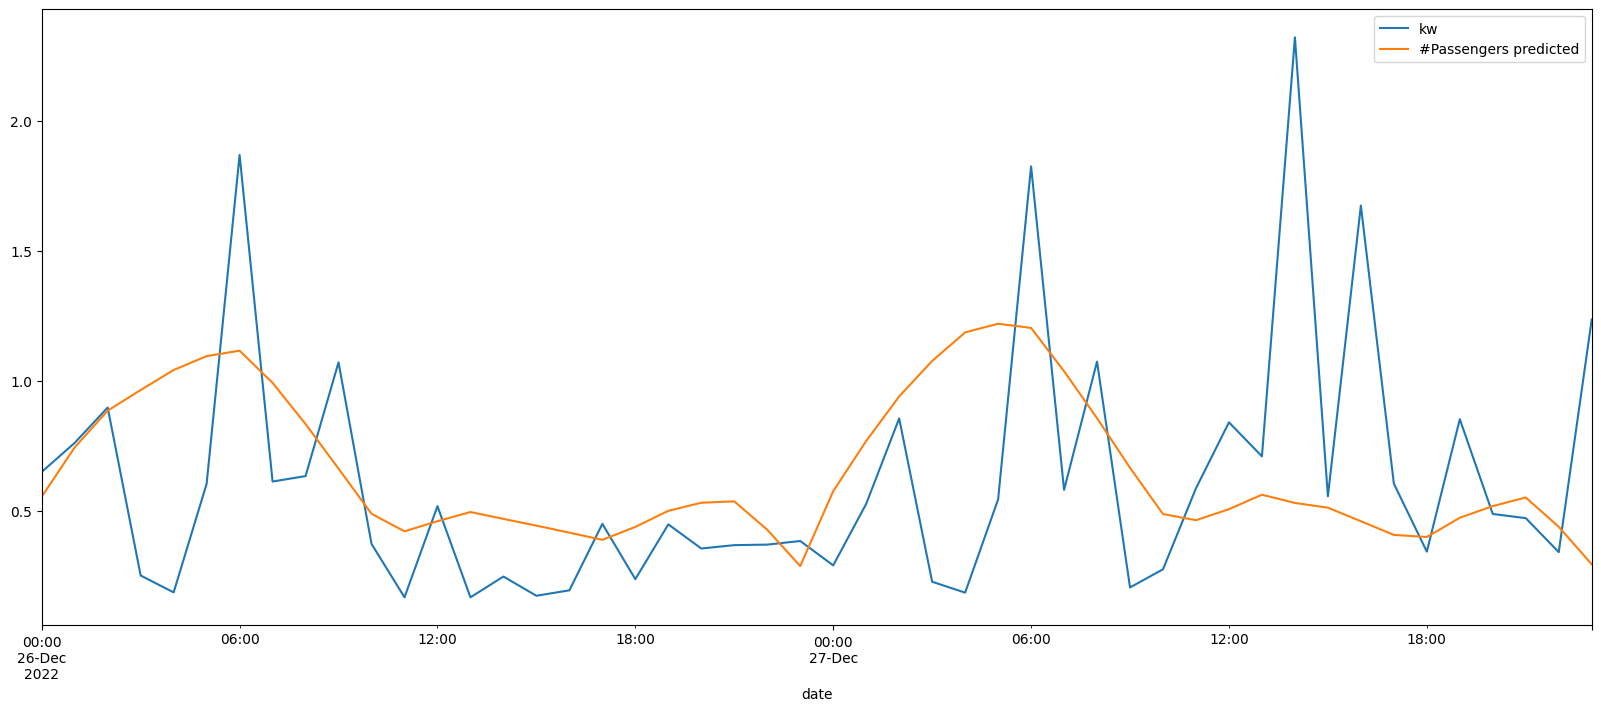

In [22]:
from sklearn.neural_network import MLPRegressor

model = Pipeline([
    ('scaler', StandardScaler()),
    ('method', MLPRegressor())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = model.predict(X_test)

print_results(y_test, y_test_pred)

### Gradient Boosting
Gradient Boosting is a powerful machine learning technique for building regression and classification models. It is an ensemble method that combines the predictions of multiple weak learners, typically decision trees, to produce a final prediction.

The basic idea of gradient boosting is to sequentially add decision trees to the model, with each tree attempting to correct the errors of the previous trees. At each stage of the algorithm, the model computes the difference between the predicted and actual output values, known as the residual error. The next decision tree is then trained to predict the residual error, rather than the original output values.

The key to gradient boosting's success is the use of gradient descent optimization to iteratively improve the model. After each decision tree is added, the model computes the gradient of the loss function with respect to the predicted output values, and adjusts the model parameters to minimize the loss function. This process is repeated until the model reaches a pre-defined stopping criterion, such as a maximum number of iterations or a minimum improvement in the loss function.

real values: [0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0.342 0.852 0.487 0.471 0.34  1.236]
Predictions: [0.50438007 0.61778751 0.86815606 0.83131477 0.75013946 0.74409348
 1.46045337 0.97217288 0.50635572 0.43510245 0.39397721 0.41513094
 0.53917211 0.53917211 0.5237205  0.44121794 0.45038407 0.47579941
 0.57092008 0.60289888 0.59892814 0.53496813 0.45455023 0.43603956
 0.50521695 0.60453076 0.86899293 0.84660355 0.75097633 0.6746649
 1.45973113 0.97145065 0.50563349 0.43438021 0.39325498 0.4144087
 0.54257576 0.54257576 0.52197758 0.43947502 0.44864115 0.47405649
 0.5715512  0.60881518 0.62357828 0.5354321  0.45501419 0.42865444]
MAE: 0.3017597294574253
MSE: 0.19310289022056445
RMSE: 0.43943473943301803
R2: 0.1450033887017459


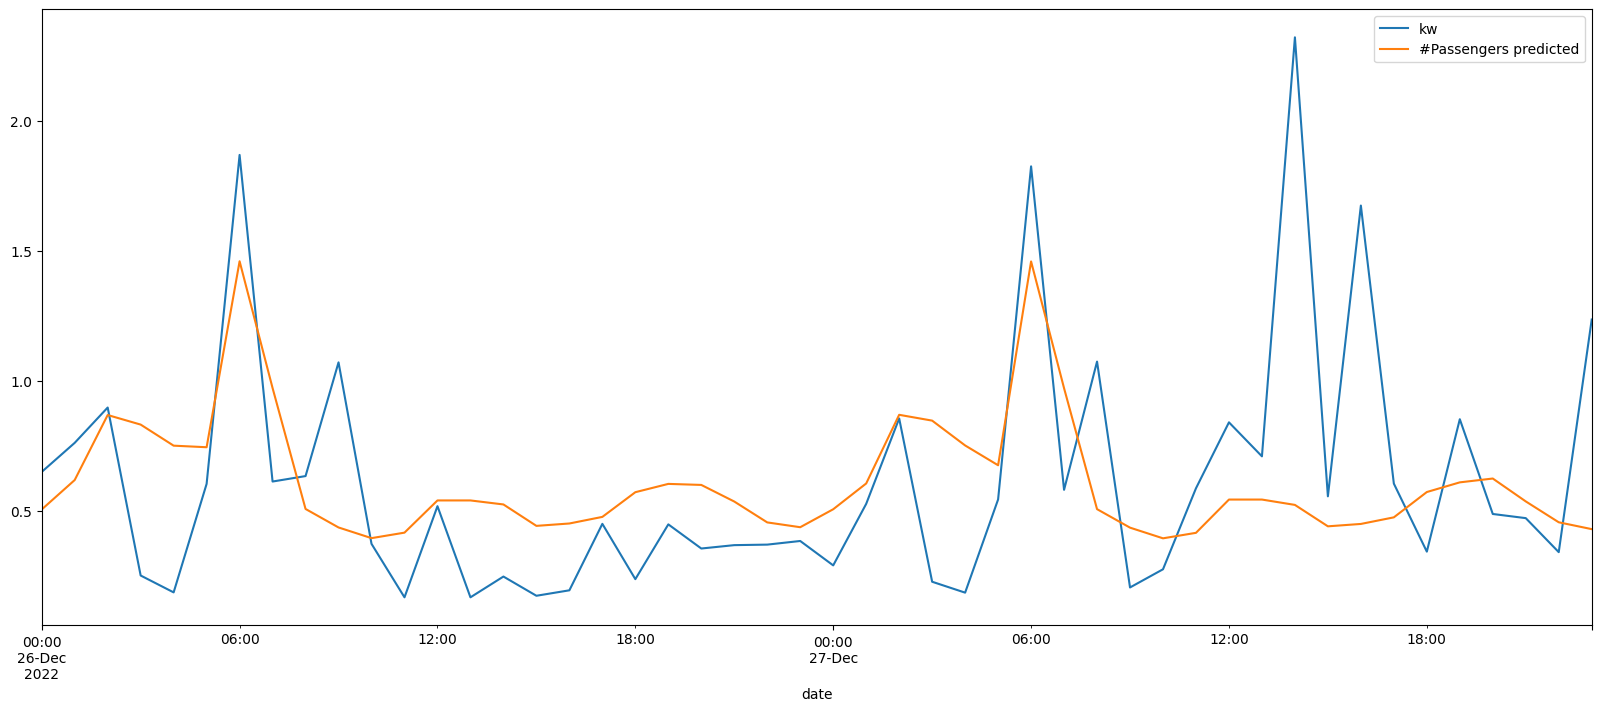

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

model = Pipeline([
    ('scaler', StandardScaler()),
    ('method', GradientBoostingRegressor())
]).fit(X_train, y_train)

# use the model to predict values for the test set
y_test_pred = model.predict(X_test)

print_results(y_test, y_test_pred)

### Long Short-Term Memory
LSTM (Long Short-Term Memory) is a type of Recurrent Neural Network (RNN) that is particularly useful for time series forecasting. LSTMs are capable of handling time series data with long-term dependencies, which can be challenging for traditional neural networks.

LSTMs work by maintaining memory cells that can selectively retain or forget information at each time step, based on the current input and the previous state of the cell. The output of the LSTM at each time step is determined by both the current input and the previous state of the cell. This allows LSTMs to capture patterns in the time series data that are dependent on past events.

An example of using LSTM for time series forecasting might involve predicting the stock prices of a particular company based on historical price data. The LSTM model would be trained on a dataset of past prices and other relevant data (such as trading volume, news articles, and economic indicators). Once the model is trained, it can be used to make predictions for future prices based on new input data.

Another example could be predicting weather patterns based on historical climate data. The LSTM model would be trained on data from previous years, including temperature, humidity, air pressure, and other weather-related variables. The model would then be used to predict future weather patterns, which could be useful for a variety of applications such as agriculture, transportation, and energy production.

Overall, LSTMs are a powerful tool for time series forecasting, capable of capturing complex patterns in the data and making accurate predictions for future events.

In [24]:
import numpy as np

# get data prior to 2022-12-28 and resample to hour
df_energy = pd.read_csv("./data/house_consumption.csv", parse_dates=True)
df_energy.date = pd.to_datetime(df_energy.date)
query = df_energy.date < "2022-12-28"
df_energy = df_energy[query]
df_energy.set_index('date', inplace=True)
df_energy = df_energy.resample('H').mean()
df_energy.fillna(method='bfill', inplace=True) #fill some missing values

# expand the date to its components (we can't feed the algorithms with dates/strings)
df_energy['hour'] = df_energy.index.hour
df_energy['day of week'] = df_energy.index.dayofweek

df_target = df_energy['kw']
df_energy.drop('kw', axis=1, inplace=True)

# 24 hours span
window_size = 48
X = np.array([df_energy.iloc[i:i+window_size, :] for i in range(len(df_energy)-window_size+1)])
X = np.reshape(X, (X.shape[0], -1))
X = pd.DataFrame(X)

# use the index of the last reading as reference
X.index = df_energy.index[window_size-1:]
y = df_target[X.index]

X.head()

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
date,,,,,,,,,,,,,,,,,,,,,
2021-02-06 09:00:00,10,3,11,3,12,3,13,3,14,3,...,5,5,6,5,7,5,8,5,9,5
2021-02-06 10:00:00,11,3,12,3,13,3,14,3,15,3,...,6,5,7,5,8,5,9,5,10,5
2021-02-06 11:00:00,12,3,13,3,14,3,15,3,16,3,...,7,5,8,5,9,5,10,5,11,5
2021-02-06 12:00:00,13,3,14,3,15,3,16,3,17,3,...,8,5,9,5,10,5,11,5,12,5
2021-02-06 13:00:00,14,3,15,3,16,3,17,3,18,3,...,9,5,10,5,11,5,12,5,13,5


In [25]:
n1 = 21 * 24
n2 = 7 * 24

X_train = X[:-n1]
y_train = y[:-n1]

X_val = X[-n1: -n2]
y_val = y[-n1: -n2]

X_test = X[-n2:]
y_test = y[-n2:]

print('shapes:')
X_train.shape, X_val.shape, X_test.shape

shapes:


((16047, 96), (336, 96), (168, 96))

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the LSTM model
model = keras.Sequential()
model.add(layers.LSTM(units=256, input_shape=(X_train.shape[1], 1)))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=1, activation='relu'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
hist = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val))

# Make predictions on test data
y_test_pred = model.predict(X_test)

Metal device set to: Apple M1 Pro


2023-03-13 14:10:32.149868: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-13 14:10:32.149988: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/5


2023-03-13 14:10:32.493321: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-13 14:10:33.226297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-13 14:10:33.358738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-13 14:10:33.669661: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


502/502 [==============================] - ETA: 0s - loss: 0.2089

2023-03-13 14:10:51.651453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-13 14:10:51.701887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


502/502 [==============================] - 20s 36ms/step - loss: 0.2089 - val_loss: 0.2979
Epoch 2/5
502/502 [==============================] - 17s 34ms/step - loss: 0.2024 - val_loss: 0.2427
Epoch 3/5
502/502 [==============================] - 17s 35ms/step - loss: 0.2016 - val_loss: 0.2545
Epoch 4/5
502/502 [==============================] - 17s 34ms/step - loss: 0.2003 - val_loss: 0.2532
Epoch 5/5
502/502 [==============================] - 17s 33ms/step - loss: 0.2006 - val_loss: 0.2594


2023-03-13 14:12:00.892932: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-13 14:12:00.939927: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


6/6 [==============================] - 1s 45ms/step


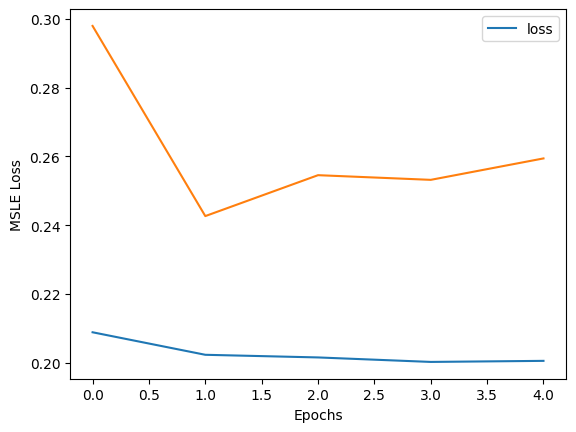

In [27]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss'])
plt.show()

real values: [0.125 0.398 0.809 1.613 0.817 0.538 1.796 0.533 0.747 0.265 0.233 0.214
 0.646 0.207 0.113 0.101 0.737 0.467 0.273 0.261 0.928 0.778 0.74  0.698
 0.603 0.607 0.873 0.343 1.35  2.3   2.641 0.527 0.537 0.694 1.146 0.395
 0.565 0.121 0.143 0.108 0.108 0.589 0.402 1.548 0.347 0.315 0.306 0.385
 0.249 0.532 1.116 0.599 0.45  0.131 0.114 0.098 0.113 1.081 0.994 0.365
 0.709 0.405 0.423 1.713 0.848 1.351 0.268 0.233 0.55  1.317 0.536 0.493
 0.351 0.564 0.856 1.675 1.119 0.532 1.808 0.536 0.982 0.13  0.121 0.387
 1.937 0.823 0.957 3.033 2.903 1.363 2.041 1.77  1.181 1.394 2.162 1.298
 0.256 0.515 0.881 0.688 0.815 0.602 1.887 0.618 0.209 0.259 0.252 2.631
 1.382 1.419 0.492 0.318 0.297 0.548 0.347 0.472 0.482 0.413 0.454 0.743
 0.649 0.761 0.897 0.25  0.185 0.603 1.87  0.612 0.633 1.071 0.372 0.166
 0.517 0.166 0.246 0.172 0.193 0.449 0.236 0.447 0.354 0.367 0.369 0.383
 0.289 0.526 0.855 0.226 0.184 0.543 1.826 0.58  1.074 0.204 0.274 0.586
 0.84  0.709 2.323 0.555 1.675 0.604 0

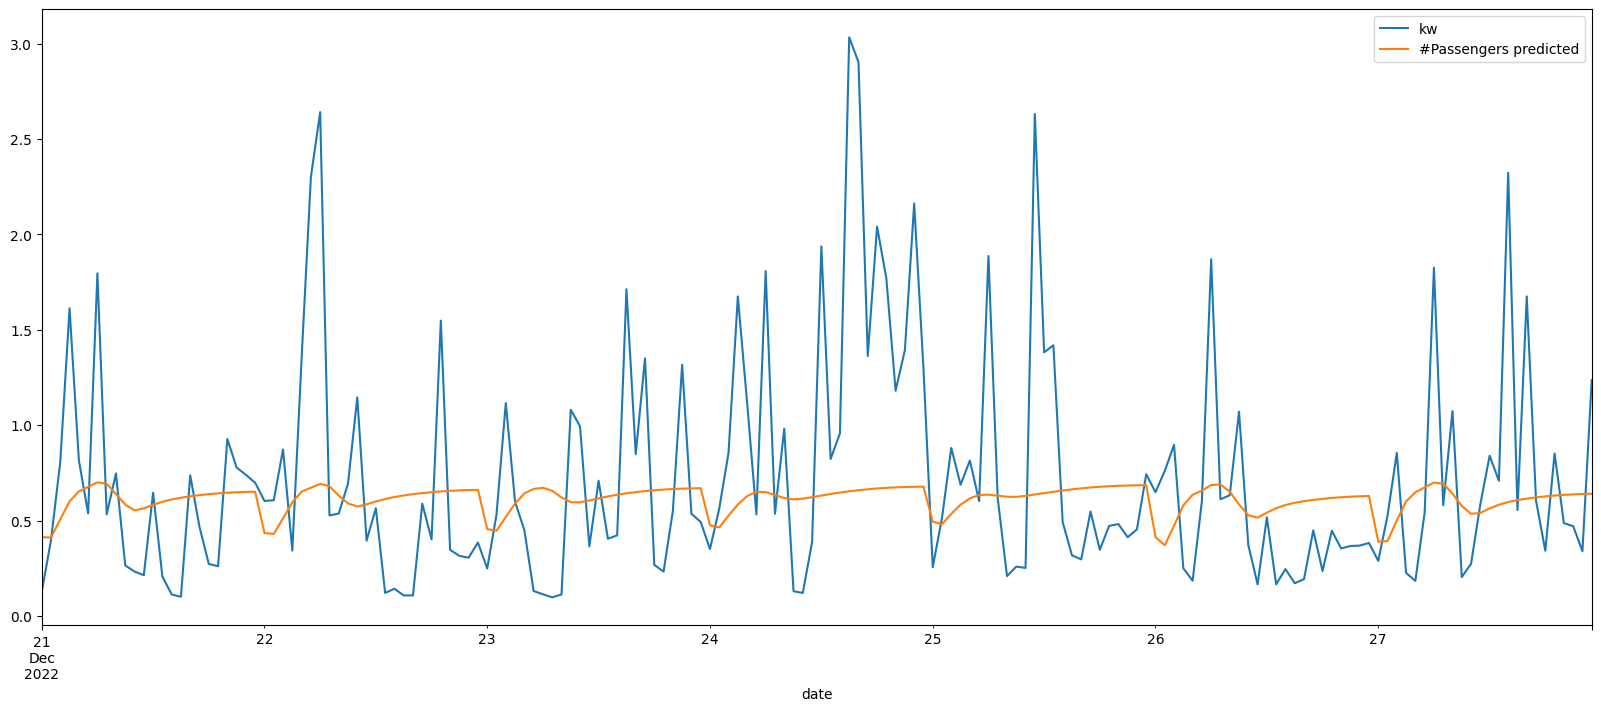

In [28]:
print_results(y_test, y_test_pred.reshape(1,-1)[0])

### Conclusion
In conclusion, there are many different machine learning regression methods available to choose from, each with their own strengths and weaknesses depending on the specific task and dataset. The examples provided here are just a small subset of the many possible approaches that can be used.

It is important to carefully tune the hyperparameters of each method to achieve optimal performance, as different hyperparameters can have a significant impact on the final results. Additionally, there may be other preprocessing techniques or data transformations that could be used to further improve the accuracy of the models (e.g., adition of time lags). These were not used in the above examples.

Furthermore, it is worth noting that time series data require a specific type of cross-validation called time series cross-validation. This method takes into account the sequential nature of the data and avoids any leakage of future information into the training set. This was not considered for the examples provided here, and therefore, the results may not be as accurate as they could have been.

In summary, while there are many different regression methods available, it is important to carefully consider the specific task and dataset at hand, tune the hyperparameters, and use appropriate cross-validation techniques, such as time series cross-validation, to ensure the most accurate results.


##  Autoregressive Integrated Moving Average models

ARIMA (Autoregressive Integrated Moving Average) models are a popular class of time series models used for forecasting, having numerous applications in a variety of industries. It is widely used in demand forecasting, such as predicting future demand in the food industry.

There are several variants of ARIMA models, such as:

- __Seasonal ARIMA (SARIMA) models__: These models are an extension of ARIMA models that take into account the seasonal component of a time series. SARIMA models incorporate seasonal differences, seasonal autoregressive (SAR) terms, and seasonal moving average (SMA) terms in addition to the non-seasonal terms of an ARIMA model.

- __ARIMA with exogenous variables (ARIMAX)__: These models are an extension of ARIMA models that include additional independent variables, also known as exogenous variables, that may be useful in predicting the time series. ARIMAX models can be useful when there are external factors that influence the time series.

The choice of which model to use depends on the specific characteristics of the time series being modeled and the nature of the forecasting problem.

### ARIMA

In theory, ARIMA models are the most general class of models for forecasting a time series that can be made "stationary" by differencing (if necessary), possibly in conjunction with nonlinear transformations such as logging or deflating.

A stationary random variable is one whose statistical properties remain constant over time. A stationary series has no trend, constant amplitude variations around its mean, and wiggles in a consistent manner, i.e., its short-term random time patterns always look the same statistically. The latter condition implies that its autocorrelations (correlations with its own prior deviations from the mean) are constant over time, or that its power spectrum is constant over time.

A random variable of this type can be viewed (as usual) as a combination of signal and noise, with the signal (if present) being a pattern of fast or slow mean reversion, sinusoidal oscillation, or rapid sign alternation, and possibly a seasonal component. An ARIMA model can be thought of as a "filter" that attempts to separate the signal from the noise before extrapolating the signal into the future to generate forecasts.

The ARIMA forecasting equation for a stationary time series is a linear (i.e., regression-type) equation in which the predictors are lags of the dependent variable and/or lags of the forecast errors.

__Predicted value of Y = "a constant" + "a weighted sum of one or more recent values of Y" + "a weighted sum of one or more recent values of the errors"__

So, ARIMA stands for Auto-Regressive Integrated Moving Average. In the forecasting equation, lags of the stationarized series are called __autoregressive terms__, lags of forecast errors are called __moving average__ terms, and a time series that must be differenced to become stationary is called an "integrated" version of a stationary series.

An $ARIMA(p, d, q)$ model is a nonseasonal ARIMA model, where:

- $p$  represents the number of lagged observations of the dependent variable (also called "lags") included in the model. In other words, it is the number of previous time steps that are used to predict the current value of the time series.

- $d$ represents the degree of differencing used to make the time series stationary. Differencing involves subtracting each observation from the previous observation to remove the trend and seasonality, resulting in a stationary time series. $d$ represents the number of times this differencing is performed.

- $q$ represents the number of lagged forecast errors (also called "residuals") included in the model. These are the errors that result from the difference between the actual and predicted values in the time series. The inclusion of these lagged errors allows the model to capture any remaining patterns or dependencies in the time series.

ARIMA models can be used to model any 'non-seasonal' time series that has patterns and is not random white noise. If a time series possesses seasonal patterns, it is necessary to add seasonal terms and it becomes SARIMA, short for 'Seasonal ARIMA'. More on that once ARIMA is completed.

### Making a series stationary

Making the time series stationary is the first step in developing an ARIMA model, because the term "Auto Regressive" in ARIMA refers to a linear regression model that employs its own lags as predictors. Linear regression models perform best when the predictors are uncorrelated and independent of one another. So, to make the series sationary the most common method is to differentiate it. To put it another way, subtract the previous value from the current value. Depending on the complexity of the series, more than one differencing may be required at times. As a result, the value of $d$ is the smallest number of differencing required to make the series stationary. And $d = 0$ if the time series is already stationary.


### Pure Auto Regressive
A simple Auto Regressive, $AR(p)$, model is one in which $Y_t$ is solely determined by its own lags. That is, $Y_t$ is a function of $Y_t$'s lags.

$$Y_t = \alpha + \beta_1 Y_{t-1} + \beta_2 Y_{t-2} + \cdots + \beta_p Y_{t-p} + \epsilon_t
= \alpha + \sum_{i=1}^p \beta_i Y_{t-i} + \epsilon_t $$

where $Y_{t-i}$ is the series' $lag_i$, ..., $\beta_i$ is the $lag_i$ coefficient estimated by the model, and $alpha$ is the intercept term estimated by the model.

### Pure Moving Average
Similarly, a pure Moving Average, $MA(q)$, model is one in which $Y_t$ is determined solely by the lagged forecast errors.

$$ Y_t = \alpha + \epsilon_t + \phi_1 \epsilon_{t-1} + \phi_2 \epsilon_{t-2} + \cdots + \phi_q \epsilon_{t-p}
= \alpha+ \epsilon_t + \sum_{i=1}^q \phi_i \epsilon_{t-i} $$

where the error terms are the errors of the respective lag autoregressive models, i.e., they are noise.

### ARMA

Then, an $ARMA(p,q)$ is simply the combination of both AR and MA models into a single equation:

$$Y_t =  \alpha + \epsilon_t + \sum_{i=1}^q \phi_i \epsilon_{t-i} + \sum_{i=1}^p \beta_i Y_{t-i}$$

### Autoregression + Integrated + Moving average

An ARIMA model is one where the time series was differenced at least once to make it stationary and you combine the AR and the MA terms.

- AR (Autoregression): Model that shows a changing variable that regresses on its own lagged/prior values.

- I (Integrated): Differencing of raw observations to allow for the time series to become stationary

- MA (Moving average): Dependency between an observation and a residual error from a moving average model

For further an initial, more advanced reading, we suggest the following page: https://online.stat.psu.edu/stat510/book/export/html/665

In the follwoing, we can see that Rolling Mean itself has a trend component even though Rolling Standard Deviation is fairly constant with time.

For time series to be stationary, we need to ensure that both Rolling Mean and Rolling Standard Deviation remain fairly constant WRT time.

Both the curves needs to be parallel to X-Axis, in our case it is not so.

## Useful libraries

There are many Python libraries available for time series forecasting, some used above, the most popular are:

- pandas: A popular library for data manipulation and analysis, including time series data. It provides convenient functions for working with time series data, such as resampling, shifting, and rolling calculations.

- numpy: A fundamental library for scientific computing in Python, which provides powerful tools for mathematical calculations and array manipulation, which are often used in time series forecasting.

- statsmodels: A library for statistical modeling and analysis, which provides a range of time series analysis tools, including ARIMA and SARIMA models, as well as seasonal decomposition and forecasting functions.

- scikit-learn: A machine learning library that includes several time series forecasting models, such as Support Vector Regression (SVR) and Random Forest Regression, which can be useful for making predictions on time series data.

- prophet: A time series forecasting library developed by Facebook, which uses an additive model with seasonality, trend, and holidays components to make predictions.

- pyflux: A library for time series modeling and forecasting, which provides a range of models, including ARIMA, VAR, and Bayesian Structural Time Series (BSTS) models.

- fbprophet: Another time series forecasting library developed by Facebook, which uses a similar approach to prophet, but provides additional functionality for handling uncertainty and seasonality.

These libraries can be used in combination with each other to perform various tasks related to time series forecasting, such as data preparation, model selection, model fitting, and prediction.

### Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

Prophet is open source software released by Facebook’s Core Data Science team. It is available for download on CRAN and PyPI.

Let us see how to use Prophet for time series forecasting in Python.

09:43:49 - cmdstanpy - INFO - Chain [1] start processing
09:43:49 - cmdstanpy - INFO - Chain [1] done processing


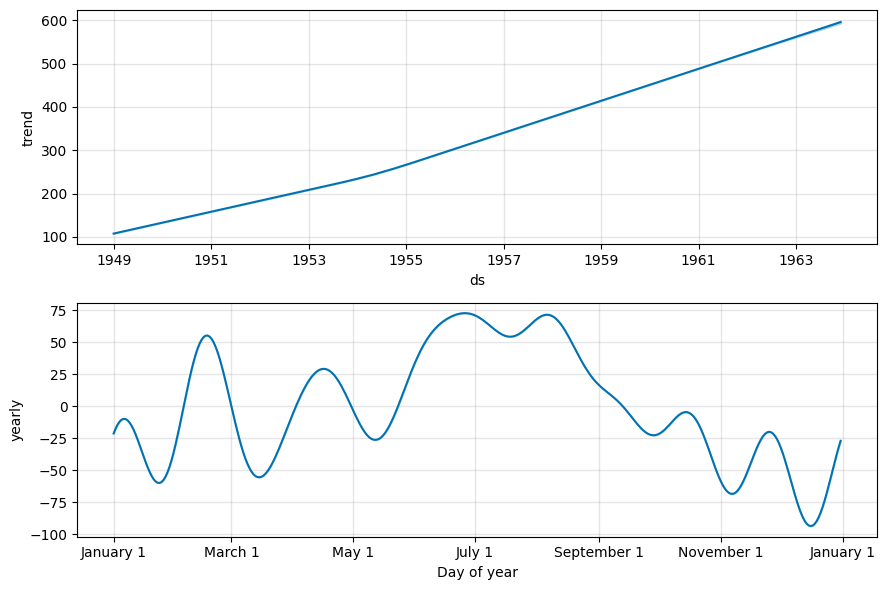

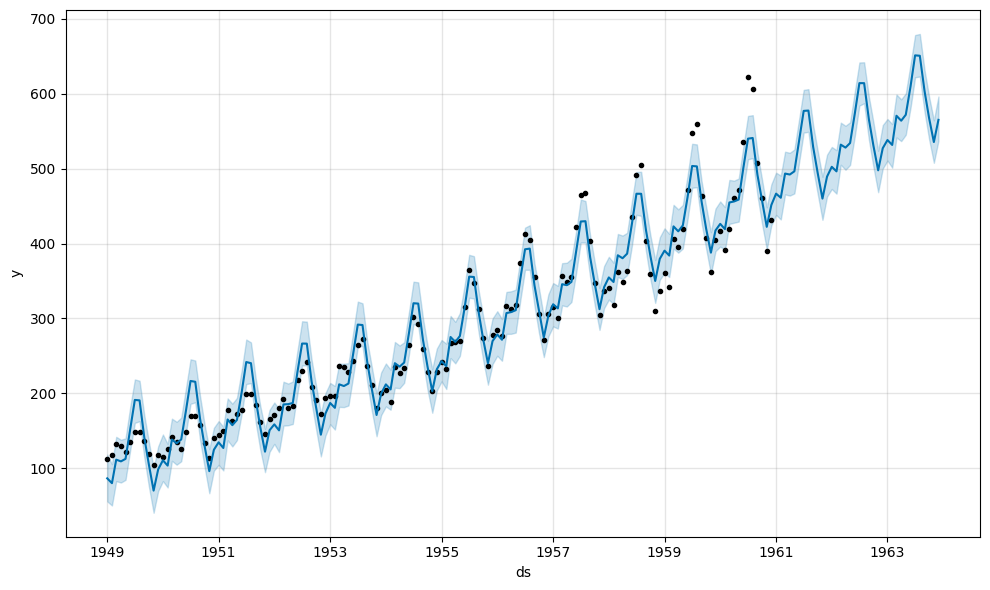

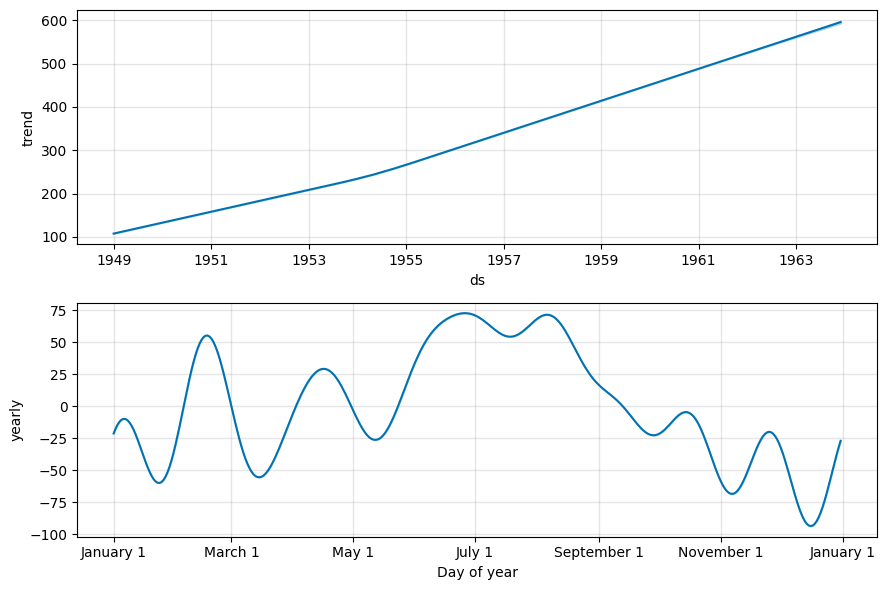

In [21]:
from prophet import Prophet
import pandas as pd

# import airline passenger data
df = pd.read_csv('./data/passengers_TS/passengers.csv', parse_dates=['Month']).drop(columns=['Unnamed: 0'], axis=1)

# prophet requires columns ds (Date) and y (value)
df = df.rename(columns={'Month':'ds', '#Passengers': 'y'})

m = Prophet()
m.fit(df)

# predict the next 3 years
future = m.make_future_dataframe(periods=36, freq='MS')
forecast = m.predict(future)

# plot forecast
m.plot(forecast)
m.plot_components(forecast)